In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-toy/titanic_toy.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic-toy/titanic_toy.csv')

In [3]:
df.head()

Age     Fare  Family  Survived
0  22.0   7.2500       1         0
1  38.0  71.2833       1         1
2  26.0   7.9250       0         1
3  35.0  53.1000       1         1
4  35.0   8.0500       0         0

In [4]:
#find the percentage of null values available in the dataset
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'], axis = 1)
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [8]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_age = X_train['Fare'].mean()
median_age = X_train['Fare'].median()

In [9]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)
X_train['Fare_median'] = X_train['Fare'].fillna(median_age)

X_train

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Age     Fare  Family   Age_mean  Age_median  Fare_mean  Fare_median
140   NaN  15.2458       2  31.885314     14.4542  15.245800      15.2458
439  31.0  10.5000       0  31.000000     31.0000  10.500000      10.5000
817  31.0  37.0042       2  31.000000     31.0000  37.004200      37.0042
378  20.0      NaN       0  20.000000     20.0000  31.885314      14.4542
491  21.0   7.2500       0  21.000000     21.0000   7.250000       7.2500
..    ...      ...     ...        ...         ...        ...          ...
835  39.0  83.1583       2  39.000000     39.0000  83.158300      83.1583
192  19.0   7.8542       1  19.000000     19.0000   7.854200       7.8542
629   NaN   7.7333       0  31.885314     14.4542   7.733300       7.7333
559  36.0  17.4000       1  36.000000     36.0000  17.400000      17.4000
684  60.0  39.0000       2  60.000000     60.0000  39.000000      39.0000

[712 rows x 7 columns]

In [10]:
print('Original Age Variance ',X_train['Age'].var())
print('After Mean Age Variance ',X_train['Age_mean'].var())
print('After Median Age Variance ',X_train['Age_median'].var())
print('')
print('Original Fare Variance ',X_train['Fare'].var())
print('After Mean Fare Variance ',X_train['Fare_mean'].var())
print('After Median Fare Variance ',X_train['Fare_median'].var())

Original Age Variance  213.7165085187578
After Mean Age Variance  172.06233657036535
After Median Age Variance  208.51965487818606

Original Fare Variance  2574.3526206637193
After Mean Fare Variance  2433.143405184275
After Median Fare Variance  2448.897024777755


In [11]:
import matplotlib.pyplot as plt

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))

X_train['Age'].plot(kind='kde',ax=ax1)
X_train['Age_mean'].plot(kind='kde',ax=ax2)
X_train['Age_median'].plot(kind='kde',ax=ax3)

lines,labels = ax1.get_legend_handles_labels()
ax1.legend(lines,labels,loc='best')

In [13]:
fig,ax = plt.subplots(1,figsize=(12,5))

X_train['Age'].plot(kind='kde',ax=ax)
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

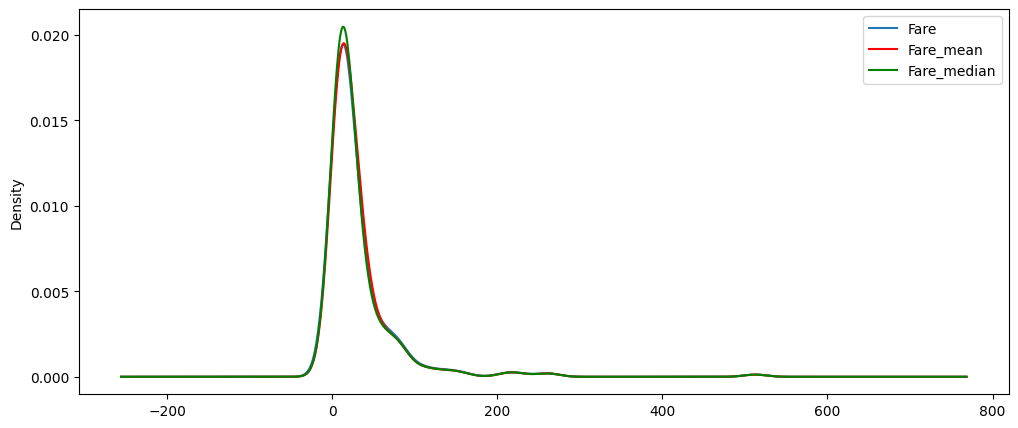

In [14]:
fig,ax = plt.subplots(1,figsize=(12,5))

X_train['Fare'].plot(kind='kde',ax=ax)
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [15]:
X_train.cov()

Age         Fare     Family    Age_mean  Age_median  \
Age          213.716509    84.480223  -6.393469  213.716509  213.716509   
Fare          84.480223  2574.352621  17.050423   63.869819   93.382660   
Family        -6.393469    17.050423   2.770177   -5.137336   -5.041474   
Age_mean     213.716509    63.869819  -5.137336  172.062337  166.129384   
Age_median   213.716509    93.382660  -5.041474  166.129384  208.519655   
Fare_mean     79.571049  2574.352621  16.115167   60.366412   88.260405   
Fare_median   79.420930  2574.352621  16.285129   60.336482   87.494022   

               Fare_mean  Fare_median  
Age            79.571049    79.420930  
Fare         2574.352621  2574.352621  
Family         16.115167    16.285129  
Age_mean       60.366412    60.336482  
Age_median     88.260405    87.494022  
Fare_mean    2433.143405  2433.143405  
Fare_median  2433.143405  2448.897025

In [16]:
X_train.corr()

Age      Fare    Family  Age_mean  Age_median  Fare_mean  \
Age          1.000000  0.106334 -0.295318  1.000000    1.000000   0.103929   
Fare         0.106334  1.000000  0.198661  0.095429    0.126774   1.000000   
Family      -0.295318  0.198661  1.000000 -0.235311   -0.209764   0.196290   
Age_mean     1.000000  0.095429 -0.235311  1.000000    0.877061   0.093297   
Age_median   1.000000  0.126774 -0.209764  0.877061    1.000000   0.123911   
Fare_mean    0.103929  1.000000  0.196290  0.093297    0.123911   1.000000   
Fare_median  0.103346  1.000000  0.197721  0.092951    0.122439   0.996778   

             Fare_median  
Age             0.103346  
Fare            1.000000  
Family          0.197721  
Age_mean        0.092951  
Age_median      0.122439  
Fare_mean       0.996778  
Fare_median     1.000000

<Axes: >

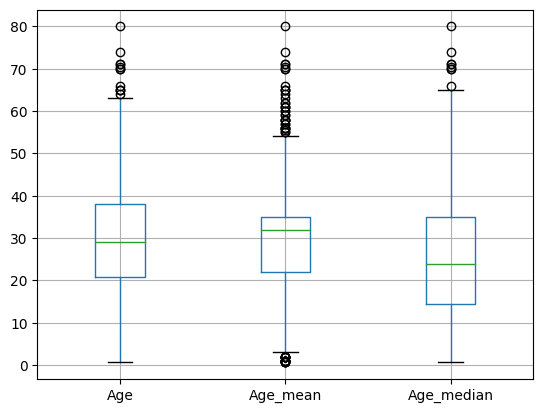

In [17]:
X_train[['Age','Age_mean','Age_median']].boxplot()

In [18]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

<Axes: >

# Using Sklearn

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [22]:
trf = ColumnTransformer([
    ['imputer1',imputer1,['Age']],
    ['imputer2',imputer2,['Fare']]
],remainder='passthrough')

In [23]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[['imputer1', SimpleImputer(strategy='median'),
                                 ['Age']],
                                ['imputer2', SimpleImputer(), ['Fare']]])

In [24]:
trf.named_transformers_['imputer1'].statistics_

array([29.])

In [25]:
trf.named_transformers_['imputer2'].statistics_

array([31.88531382])

In [26]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)
X_train

array([[29.    , 15.2458,  2.    ],
       [31.    , 10.5   ,  0.    ],
       [31.    , 37.0042,  2.    ],
       ...,
       [29.    ,  7.7333,  0.    ],
       [36.    , 17.4   ,  1.    ],
       [60.    , 39.    ,  2.    ]])